<pre><font size=6>Spoken Digit Recognition</font></pre>

<pre>
In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>

</pre>

In [3]:
import numpy as np
import pandas as pd
import librosa
import os
##if you need any imports you can do that here. 

We shared recordings.zip, please unzip those. 

In [4]:
!wget --header="Host: doc-00-7s-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Cookie: AUTH_smvf2o367eja801lv3hmgenqovh1tbcl_nonce=4m02l3olv6blg" --header="Connection: keep-alive" "https://doc-00-7s-docs.googleusercontent.com/docs/securesc/9csvdbmvo9gt489glsl99tqs7subbnk6/67mi270jjgtk4loba05f81a8t5423so6/1631524275000/00484516897554883881/01088116874641946513/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&authuser=0&nonce=4m02l3olv6blg&user=01088116874641946513&hash=9dha3qpbpilntebna8sqasvs3joc0m56" -c -O 'recordings.zip'

--2021-09-13 09:12:45--  https://doc-00-7s-docs.googleusercontent.com/docs/securesc/9csvdbmvo9gt489glsl99tqs7subbnk6/67mi270jjgtk4loba05f81a8t5423so6/1631524275000/00484516897554883881/01088116874641946513/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&authuser=0&nonce=4m02l3olv6blg&user=01088116874641946513&hash=9dha3qpbpilntebna8sqasvs3joc0m56
Resolving doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.googleusercontent.com)... 74.125.69.132, 2607:f8b0:4001:c08::84
Connecting to doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.googleusercontent.com)|74.125.69.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘recordings.zip’

recordings.zip          [  <=>               ]   8.85M  35.1MB/s    in 0.3s    

2021-09-13 09:12:46 (35.1 MB/s) - ‘recordings.zip’ saved [9282934]



In [5]:
import zipfile
with zipfile.ZipFile("/content/recordings.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
import os
len(os.listdir("recordings")) #there are 2000 audi files

2000

In [ ]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"

In [7]:
all_files=[]

In [8]:
for i in os.listdir("/content/recordings"):
    a1="/content/recordings/" +str(i)
    all_files.append(a1)

In [9]:
len(all_files)

2000

In [10]:
all_files[0]

'/content/recordings/9_yweweler_13.wav'

<font size=4>Grader function 1 </font>

In [11]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [12]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
all_files[17]

'/content/recordings/9_nicolas_43.wav'

In [13]:
#creating labels
label=[]
import re
for i in all_files:
    x = int(re.findall('[0-9]+', i)[0])
    label.append(x)

In [14]:
len(label)  #labels are created

2000

In [15]:
print(all_files[12])
print("*********")
print(label[12])

/content/recordings/5_jackson_31.wav
*********
5


In [16]:
df_audio=pd.DataFrame(list(zip(all_files, label)),columns =['path', 'label'])
df_audio.head(20)

,path,label
0,/content/recordings/9_yweweler_13.wav,9
1,/content/recordings/0_theo_27.wav,0
2,/content/recordings/9_jackson_45.wav,9
3,/content/recordings/9_nicolas_19.wav,9
4,/content/recordings/4_theo_45.wav,4
5,/content/recordings/4_nicolas_10.wav,4
6,/content/recordings/0_nicolas_23.wav,0
7,/content/recordings/2_yweweler_29.wav,2
8,/content/recordings/6_theo_20.wav,6
9,/content/recordings/1_yweweler_47.wav,1


In [17]:
df_audio.shape

(2000, 2)

In [18]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [19]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [20]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [21]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_files, label, test_size=0.30, random_state=45,stratify=label)

In [22]:
print(type(X_train))
print(len(X_train))

print("*********")

print(type(y_train))
print(len(y_train))

<class 'list'>
1400
*********
<class 'list'>
1400


In [23]:
X_train[12]

'/content/recordings/1_yweweler_25.wav'

In [24]:
print(type(X_test))
print(len(X_test))
print("*******")
print(type(y_test))
print(len(y_test))

<class 'list'>
600
*******
<class 'list'>
600


In [25]:
X_train=pd.DataFrame(X_train,columns=["path"])
y_train=pd.DataFrame(y_train,columns=['label'])
X_test=pd.DataFrame(X_test,columns=['path'])
y_test=pd.DataFrame(y_test,columns=["label"])

In [26]:
print(X_train.shape)
print(y_train.shape)
print("************")
print(X_test.shape)
print(y_test.shape)

(1400, 1)
(1400, 1)
************
(600, 1)
(600, 1)


In [27]:
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


<font size=4>Grader function 3 </font>

In [28]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [29]:
print(X_train)

                                       path
0         /content/recordings/6_theo_24.wav
1     /content/recordings/1_yweweler_32.wav
2     /content/recordings/6_yweweler_45.wav
3      /content/recordings/5_jackson_49.wav
4      /content/recordings/0_jackson_24.wav
...                                     ...
1395   /content/recordings/2_nicolas_49.wav
1396  /content/recordings/8_yweweler_23.wav
1397   /content/recordings/0_nicolas_32.wav
1398    /content/recordings/3_nicolas_6.wav
1399       /content/recordings/2_theo_3.wav

[1400 rows x 1 columns]


In [30]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [31]:
X_train.path[0]

'/content/recordings/6_theo_24.wav'

In [32]:
from tqdm import tqdm
x_train_ls_samples=[]
x_train_ls_duration=[]

for i in tqdm(X_train.path):
    s1,d1=load_wav(i)
    x_train_ls_samples.append(s1)
    x_train_ls_duration.append(d1)


100%|██████████| 1400/1400 [00:21<00:00, 65.76it/s]


In [33]:
X_train_processed=pd.DataFrame(list(zip(x_train_ls_samples, x_train_ls_duration)),columns =['raw_data', 'duration'])

In [34]:
print(X_train_processed.shape)
print(type(X_train_processed))
print("*****")
print(X_train_processed.head(6))

(1400, 2)
<class 'pandas.core.frame.DataFrame'>
*****
                                            raw_data  duration
0  [0.00076898345, 0.0006697864, 0.00023488962, -...  0.499002
1  [5.9146714e-05, 6.741898e-05, 7.909497e-05, 9....  0.270159
2  [-0.0002240487, -0.00023717241, -0.00022053233...  0.255420
3  [0.01055219, 0.01332846, 0.014389632, 0.014420...  0.479909
4  [-0.010665349, -0.013037161, -0.01384184, -0.0...  0.642041
5  [-0.043248296, -0.028579358, -0.00053534476, 0...  0.474512


In [35]:
print(type(X_train_processed.raw_data[11]))

<class 'numpy.ndarray'>


In [36]:
x_test_ls_samples=[]
x_test_ls_duration=[]
for i in tqdm(X_test.path):
    s2,d2=load_wav(i)
    x_test_ls_samples.append(s2)
    x_test_ls_duration.append(d2)

100%|██████████| 600/600 [00:08<00:00, 70.44it/s]


In [37]:
X_test_processed=pd.DataFrame(list(zip(x_test_ls_samples, x_test_ls_duration)),columns =['raw_data', 'duration'])

In [38]:
print(X_test_processed.shape)
print("********")
print(X_test_processed.head(6))

(600, 2)
********
                                            raw_data  duration
0  [-3.0896386e-05, 4.630324e-05, 0.0001238384, 0...  0.266259
1  [0.0001578252, 0.00016368195, 0.00016087637, 0...  0.282132
2  [-5.8392292e-08, 0.00026674374, 0.0003689947, ...  0.264036
3  [-0.0048882305, -0.0035996484, -0.0010624625, ...  0.818277
4  [-0.024412373, -0.0374546, -0.04497262, -0.045...  0.371020
5  [-0.00027326788, -4.2910684e-05, 8.124177e-05,...  0.222630


In [ ]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train

(array([559., 703., 126.,  10.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.14353741, 0.35746032, 0.57138322, 0.78530612, 0.99922902,
        1.21315193, 1.42707483, 1.64099773, 1.85492063, 2.06884354,
        2.28276644]),
 <a list of 10 Patch objects>)

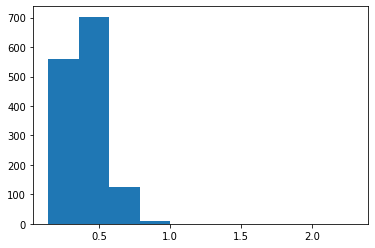

In [39]:
#plot the histogram of the duration for trian
import matplotlib.pyplot as plt
plt.hist(X_train_processed.duration)

(array([243., 316.,  30.,   9.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.16204082, 0.36542857, 0.56881633, 0.77220408, 0.97559184,
        1.17897959, 1.38236735, 1.5857551 , 1.78914286, 1.99253061,
        2.19591837]),
 <a list of 10 Patch objects>)

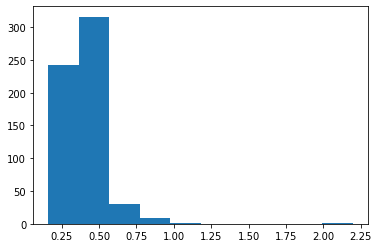

In [40]:
#plot the histogram of the duration for trian
plt.hist(X_test_processed.duration)

In [41]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for i in range(0,100+1,10):
    print(str(i)+"th percentile is",np.percentile(X_train_processed.duration,i))

0th percentile is 0.1435374149659864
10th percentile is 0.25989569160997733
20th percentile is 0.29777777777777775
30th percentile is 0.33037188208616775
40th percentile is 0.357859410430839
50th percentile is 0.3905215419501134
60th percentile is 0.41733333333333333
70th percentile is 0.44623582766439907
80th percentile is 0.4867392290249433
90th percentile is 0.5698140589569162
100th percentile is 2.282766439909297


In [42]:
##print 90 to 100 percentile values with step size of 1. 
for i in range(90,100+1,1):
    print(str(i)+"th percentile is",np.percentile(X_train_processed.duration,i))

90th percentile is 0.5698140589569162
91th percentile is 0.5810512471655329
92th percentile is 0.5915356009070297
93th percentile is 0.6079006802721089
94th percentile is 0.6207873015873016
95th percentile is 0.6294943310657595
96th percentile is 0.6431455782312925
97th percentile is 0.6611179138321994
98th percentile is 0.6925750566893424
99th percentile is 0.7654394557823128
100th percentile is 2.282766439909297


<font size=4>Grader function 4 </font>

In [43]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<pre>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset. 

While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640

Pad with Zero if length of sequence is less than 17640 else Truncate the number. 

Also create a masking vector for train and test. 

masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.
</pre>

In [ ]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask
## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

In [44]:
max_length  = 17640

In [45]:
X_train_pad_seq=np.zeros((len(X_train_processed),max_length))
X_test_pad_seq=np.zeros((len(X_test_processed), max_length))
X_train_mask=np.zeros((len(X_train_processed),max_length),dtype="bool")  #masked train numpy array
X_test_mask=np.zeros((len(X_test_processed), max_length),dtype="bool")  # masked test numpy array 

In [46]:
print(X_train_mask.dtype)
print("*********")
print(X_test_mask.dtype)

bool
*********
bool


In [47]:
print(X_train_pad_seq.shape)
print(X_train_mask.shape)
print("***********")
print(X_test_pad_seq.shape)
print(X_test_mask.shape)

(1400, 17640)
(1400, 17640)
***********
(600, 17640)
(600, 17640)


In [48]:
len(X_train_processed.raw_data[999])

12969

In [49]:
for i in range(len(X_train_processed)):
    for j  in range(len(X_train_processed.raw_data[i])):
        if j  < 17640:
            X_train_pad_seq[i][j]= X_train_processed.raw_data[i][j]
            X_train_mask[i][j]=1


In [50]:
for i in range(len(X_test_processed)):
    for j in range(len(X_test_processed.raw_data[i])):
        if j  < 17640:
            X_test_pad_seq[i][j]=X_test_processed.raw_data[i][j]
            X_test_mask[i][j]=1

In [51]:
X_test_mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [52]:
import numpy as np
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [53]:
y_train.shape

(1400, 1)

In [54]:
print(type(y_train))

<class 'numpy.ndarray'>


In [55]:
y_train=y_train.reshape(len(y_train))
y_test=y_test.reshape(len(y_test))

<font size=4>Grader function 5 </font>

In [56]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 

<pre>
Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). 
3. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
4. make sure that it won't overfit. 
5. You are free to include any regularization
</pre>

#tensorboard callback for model 1

In [57]:
%load_ext tensorboard

In [58]:
!rm -rf ./logs/
import datetime
import os

In [ ]:
import tensorflow as tf
logdir1 = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback1= tf.keras.callbacks.TensorBoard(log_dir=logdir1, histogram_freq=1,write_graph=True,write_grads=True)

#micro f1 score callback

In [152]:

from sklearn.metrics import f1_score
class micro_f1_score1(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics11={'f1_score': []}

    def on_epoch_end(self, epoch, logs={}): 
        y_pred_final=[]
        for i in range(len(y_test)):
            a91=X_test_pad_seq11[i].T
            a92=np.reshape(X_test_mask[i],(1,17640))
            y_pred=np.argmax(self.model.predict((a91,a92)))
            y_pred_final.append(y_pred)

        from sklearn.metrics import f1_score
        f11=f1_score(y_test,y_pred_final,average='micro')

        

        self.metrics11["f1_score"].append(f11)

        if self.metrics11["f1_score"][epoch] > 0.10:
             print("micro f1 score has reached 0.10% so training is stopping")
             self.model.stop_training = True


        print("f1 score is ",self.metrics11["f1_score"][epoch])
 

In [153]:
f1_score1 = micro_f1_score1()

#model1

In [154]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

In [155]:
## as discussed above, please write the LSTM
input_layer=Input(shape=(max_length,1),dtype="float32")
input_mask=Input(shape=(max_length),dtype="bool")
lstm_layer=LSTM(30, name="lstm_layer")(inputs = input_layer,mask = input_mask)
dense_layer=Dense(64, activation="relu")(lstm_layer)
output_layer=Dense(10,activation="softmax")(dense_layer)
model1=Model(inputs=[input_layer,input_mask], outputs=output_layer)

In [156]:
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm_layer (LSTM)               (None, 30)           3840        input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 64)           1984        lstm_layer[0][0]           

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [62]:
print(X_train_pad_seq.shape)
print(X_train_mask.shape)
print("***********")
print(X_test_pad_seq.shape)
print(X_test_mask.shape)

(1400, 17640)
(1400, 17640)
***********
(600, 17640)
(600, 17640)


In [63]:
X_train_pad_seq11=np.reshape(X_train_pad_seq,(1400,17640,1))
X_test_pad_seq11=np.reshape(X_test_pad_seq,(600,17640,1))

In [64]:
print(X_train_pad_seq11.shape)
print("*****")
print(X_test_pad_seq11.shape)

(1400, 17640, 1)
*****
(600, 17640, 1)


In [ ]:
#train your model

In [ ]:
model1.fit([X_train_pad_seq11,X_train_mask],y_train,
           epochs=2,batch_size=16,validation_data=([X_test_pad_seq11,X_test_mask],y_test),
            callbacks = [f1_score1,tensorboard_callback1])

Epoch 1/2
88/88 [==============================] - 145s 2s/step - loss: 2.3037 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
micro f1 score has reached 0.10% so training is stopping
f1 score is  0.10000000000000002


In [ ]:
logdir1

'logs/20210912-043707'

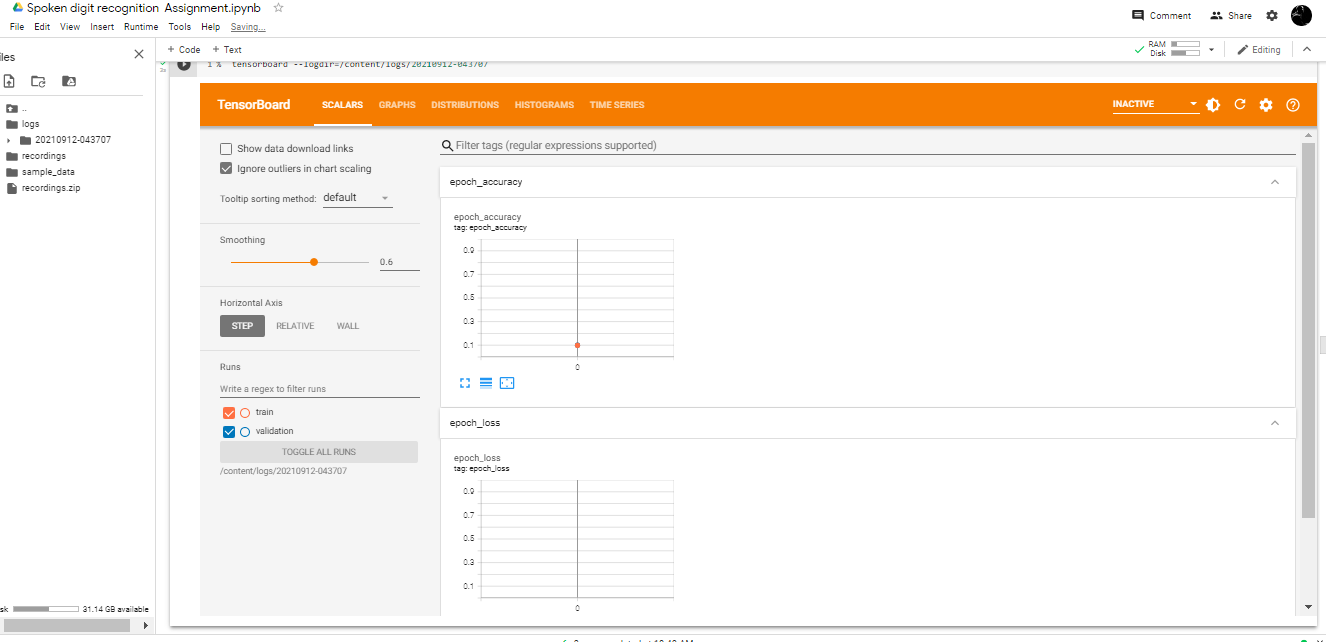

In [2]:
from IPython.display import Image
Image(filename=r'C:\Users\kingjames\Downloads\spoken image 1 final.png')

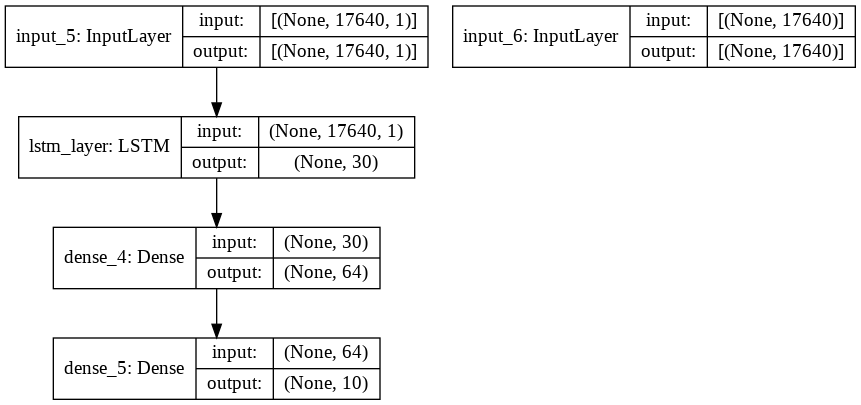

In [157]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### 2. Converting into spectrogram and giving spectrogram data as input  
<pre>
We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram
</pre>

In [59]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [60]:
print(X_train_pad_seq.shape)
print("*********")
print(X_test_pad_seq.shape)

(1400, 17640)
*********
(600, 17640)


In [65]:
print(X_train_pad_seq11.shape)
print("*********")
print(X_test_pad_seq11.shape)

(1400, 17640, 1)
*********
(600, 17640, 1)


In [ ]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)

In [66]:
X_train_spectrogram=[]

In [67]:
for i in tqdm(X_train_pad_seq):
    spectogram=convert_to_spectrogram(i)
    X_train_spectrogram.append(spectogram)

X_train_spectrogram=np.array(X_train_spectrogram)
X_train_spectrogram.shape

100%|██████████| 1400/1400 [00:08<00:00, 155.63it/s]


(1400, 64, 35)

In [68]:
X_test_spectrogram=[]

In [69]:
for i in tqdm(X_test_pad_seq):
    spectogram=convert_to_spectrogram(i)
    X_test_spectrogram.append(spectogram)

X_test_spectrogram=np.array(X_test_spectrogram)
X_test_spectrogram.shape

100%|██████████| 600/600 [00:03<00:00, 153.36it/s]


(600, 64, 35)

In [70]:
X_train_spectogram=np.array(X_train_spectrogram)
X_train_spectogram.shape

(1400, 64, 35)

<font size=4>Grader function 6 </font>

In [71]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True

<pre>
Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (#., time_steps, features) average the output of every time step i.e, you should get (#.,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
5. make sure that it won't overfit. 
6. You are free to include any regularization
</pre>

#tensorboard callback for model 2

In [81]:
logdir2 = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(logdir2, histogram_freq=1,write_graph=True,write_grads=True)

#micro f1 score for model 2

In [74]:

from sklearn.metrics import f1_score
class micro_f1_score2(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics11={'f1_score': []}

    def on_epoch_end(self, epoch, logs={}): 
        y_pred_final=[]
        for i in range(len(y_test)):
            b91=X_test_spectrogram[i]
            b92=np.reshape(b91,(1,64,35))  # here shape is differeent
            
            y_pred=np.argmax(self.model.predict((b92)))
            y_pred_final.append(y_pred)

        from sklearn.metrics import f1_score
        f11=f1_score(y_test,y_pred_final,average='micro')

        self.metrics11["f1_score"].append(f11)

        if self.metrics11["f1_score"][epoch] > 0.80:
             print("micro f1 score has reached 0.80% so training is stopping")
             self.model.stop_training = True

        

        print("f1 score is ",self.metrics11["f1_score"][epoch])
 

In [75]:
f1_score2 = micro_f1_score2()

In [76]:
from tensorflow.keras.layers import Input, LSTM, Dense , GlobalAveragePooling1D, BatchNormalization , Dropout

In [77]:
input_layer=Input(shape=(64,35),dtype="float32")

lstm_layer = LSTM(25,name = "lstm_layer",return_sequences = True)(inputs = input_layer)

average_layer = GlobalAveragePooling1D(data_format='channels_first' )(lstm_layer)

dense_1_layer = Dense(64,activation="relu",name ="dense_1_layer")(average_layer)

output_layer = Dense(10,activation = "softmax",name = "output_layer")(dense_1_layer)

model2=Model(inputs=input_layer, outputs=output_layer)


In [78]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 35)]          0         
_________________________________________________________________
lstm_layer (LSTM)            (None, 64, 25)            6100      
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_1_layer (Dense)        (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 10,910
Trainable params: 10,910
Non-trainable params: 0
_________________________________________________________________


In [79]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])  #tf.keras.optimizers.SGD(

In [82]:
model2.fit(X_train_spectogram,y_train,
           epochs=200,
           batch_size=16,
           validation_data=(X_test_spectrogram,y_test),
           callbacks = [f1_score2,tensorboard_callback2])

Epoch 1/200
88/88 [==============================] - 9s 28ms/step - loss: 2.2564 - accuracy: 0.1686 - val_loss: 2.1609 - val_accuracy: 0.2083
f1 score is  0.20833333333333334
Epoch 2/200
88/88 [==============================] - 1s 16ms/step - loss: 1.9863 - accuracy: 0.2850 - val_loss: 1.8808 - val_accuracy: 0.3567
f1 score is  0.35666666666666674
Epoch 3/200
88/88 [==============================] - 1s 16ms/step - loss: 1.7237 - accuracy: 0.4229 - val_loss: 1.6363 - val_accuracy: 0.4783
f1 score is  0.47833333333333333
Epoch 4/200
88/88 [==============================] - 1s 16ms/step - loss: 1.5343 - accuracy: 0.4979 - val_loss: 1.4883 - val_accuracy: 0.4967
f1 score is  0.49666666666666665
Epoch 5/200
88/88 [==============================] - 1s 16ms/step - loss: 1.3456 - accuracy: 0.5736 - val_loss: 1.3176 - val_accuracy: 0.5583
f1 score is  0.5583333333333333
Epoch 6/200
88/88 [==============================] - 1s 16ms/step - loss: 1.2197 - accuracy: 0.6207 - val_loss: 1.2205 - val_a

In [85]:
logdir2

'logs/20210913-091940'

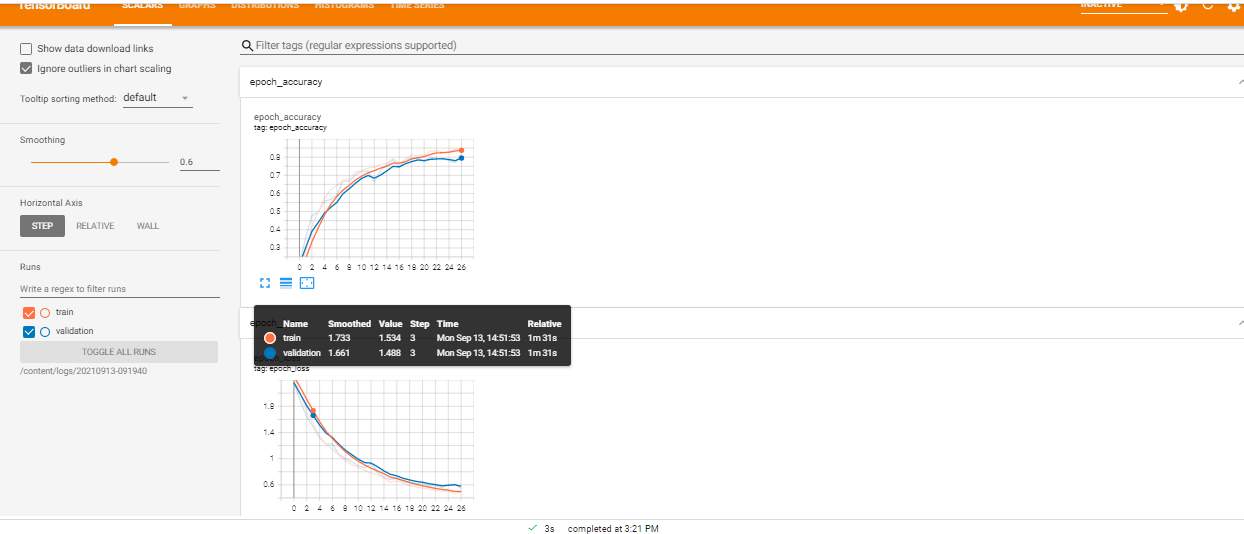

In [3]:
from IPython.display import Image
Image(filename=r'C:\Users\kingjames\Downloads\spoken image 2 tensorboard.png')

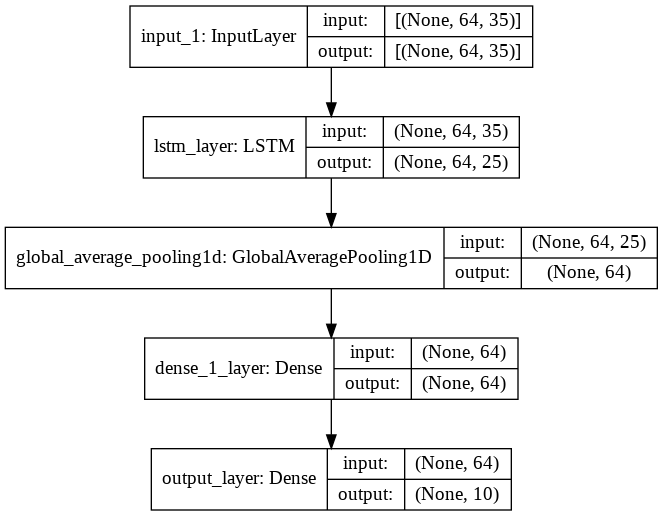

In [90]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### 3. data augmentation  
<pre>
Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.
</pre>

In [91]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(all_files, label, test_size=0.20, random_state=45,stratify=label)

In [92]:
print(len(X_train1))

1600


In [93]:
X_train1=pd.DataFrame(X_train1,columns=["path"])
y_train1=pd.DataFrame(y_train1,columns=['label'])
X_test1=pd.DataFrame(X_test1,columns=['path'])
y_test1=pd.DataFrame(y_test1,columns=["label"])

In [94]:
y_train1.label[0]

8

In [95]:
print(X_train1.shape)
print(X_train1.head(4))

(1600, 1)
                                    path
0      /content/recordings/8_theo_17.wav
1      /content/recordings/2_theo_14.wav
2  /content/recordings/7_yweweler_28.wav
3      /content/recordings/3_theo_13.wav


In [96]:
print(y_train1.shape)

(1600, 1)


In [97]:
print(X_test1.shape)

(400, 1)


#augmentation

In [98]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [99]:
X_train_augmented = []  # we only augment train data only not test data
X_test_augmented=[]  #we dont augment test data, we only augment train data

In [100]:
#train data
from tqdm import tqdm
for i in tqdm(range(len(X_train1))):
    a1=generate_augmented_data(X_train1.path[i]) #augmenting # for each point we are creating 9 duplicate point
    for j in a1:
        X_train_augmented.append(j)

100%|██████████| 1600/1600 [06:05<00:00,  4.37it/s]


In [101]:
len(X_train_augmented)

14400

In [102]:
print(type(X_train_augmented))

<class 'list'>


In [103]:
#creting samples for test data 
for i in tqdm(X_test1.path):
    s2,d2=load_wav(i)  # here no augmenting just original point as it is
    X_test_augmented.append(s2)   

100%|██████████| 400/400 [00:05<00:00, 66.72it/s]


In [104]:
len(X_test_augmented)

400

#Creating labels for augmented data

In [105]:
y_train_augmented=[]
y_test_augmented =[]

In [106]:
for i in y_train1.label:  #train
    for j in range(9):
        y_train_augmented.append(i) 

In [107]:
len(y_train_augmented)

14400

In [108]:
y_train_augmented=np.array(y_train_augmented)

In [109]:
for i in y_test1.label:  #test
    y_test_augmented.append(i) 

In [110]:
len(y_test_augmented)

400

In [111]:
y_test_augmented=np.array(y_test_augmented)

In [112]:
print(type(y_test_augmented))

<class 'numpy.ndarray'>


In [113]:
max_length=17640

In [114]:
X_train1_pad_seq_aug=np.zeros((len(X_train_augmented),max_length))
X_test1_pad_seq_aug=np.zeros((len(X_test_augmented), max_length))
X_train1_mask_aug=np.zeros((len(X_train_augmented),max_length),dtype="bool")  #masked train numpy array
X_test1_mask_aug=np.zeros((len(X_test_augmented), max_length),dtype="bool")  # masked test numpy array 

In [115]:
print(X_train1_pad_seq_aug.shape)
print(X_test1_pad_seq_aug.shape)
print(X_train1_mask_aug.shape)
print(X_test1_mask_aug.shape)

(14400, 17640)
(400, 17640)
(14400, 17640)
(400, 17640)


In [116]:
for i in range(len(X_train_augmented)):
    for j  in range(len(X_train_augmented[i])):
        if j  < 17640:
            X_train1_pad_seq_aug[i][j]= X_train_augmented[i][j]
            X_train1_mask_aug[i][j]=1


In [117]:
X_train_augmented[0]

array([0.00017661, 0.00019431, 0.00014904, ..., 0.00011464, 0.0004445 ,
       0.00030142], dtype=float32)

In [118]:
len(X_train_augmented[0])

10856

In [119]:
X_train1_pad_seq_aug[0]

array([0.00017661, 0.00019431, 0.00014904, ..., 0.        , 0.        ,
       0.        ])

In [120]:
len(X_train1_pad_seq_aug[0])

17640

In [121]:
for i in range(len(X_test_augmented)):
    for j in range(len(X_test_augmented[i])):
        if j  < 17640:
            X_test1_pad_seq_aug[i][j]=X_test_augmented[i][j]
            X_test1_mask_aug[i][j]=1

In [122]:
X_train1_pad_seq_aug11=np.reshape(X_train1_pad_seq_aug,(14400,17640,1))
X_test1_pad_seq_aug11=np.reshape(X_test1_pad_seq_aug,(400,17640,1))

In [123]:
print(X_train1_pad_seq_aug11.shape)
print("************")
print(X_test1_pad_seq_aug11.shape)

(14400, 17640, 1)
************
(400, 17640, 1)


#tensorboard callback for model 3

In [124]:
logdir3 = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback3 = tf.keras.callbacks.TensorBoard(logdir3, histogram_freq=1,write_graph=True,write_grads=True)

#micro f1 score for model3 

In [125]:
from sklearn.metrics import f1_score
class micro_f1_score3(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics11={'f1_score': []}

    def on_epoch_end(self, epoch, logs={}): 
        y_pred_final=[]
        for i in range(len(y_test_augmented)):
            c91=X_test1_pad_seq_aug11[i].T      #X_test1_pad_seq_aug11
            c92=np.reshape(X_test1_mask_aug[i],(1,17640))
            y_pred=np.argmax(self.model.predict((c91,c92)))
            y_pred_final.append(y_pred)

        from sklearn.metrics import f1_score
        f11=f1_score(y_test_augmented,y_pred_final,average='micro')

        

        self.metrics11["f1_score"].append(f11)

        if self.metrics11["f1_score"][epoch] > 0.10:
             print("micro f1 score has reached 0.10% so training is stopping")
             self.model.stop_training = True


        print("f1 score is ",self.metrics11["f1_score"][epoch])
 

In [126]:
f1_score3 = micro_f1_score3()

#Model -3 (Augmented)

In [127]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

In [128]:
## as discussed above, please write the LSTM
input_layer=Input(shape=(max_length,1),dtype="float32")
input_mask=Input(shape=(max_length),dtype="bool")
lstm_layer=LSTM(30, name="lstm_layer")(inputs = input_layer,mask = input_mask)
dense_layer=Dense(64, activation="relu")(lstm_layer)
output_layer=Dense(10,activation="softmax")(dense_layer)
model3=Model(inputs=[input_layer,input_mask], outputs=output_layer)

In [131]:
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [132]:
model3.fit([X_train1_pad_seq_aug11,X_train1_mask_aug],y_train_augmented,
           epochs=2,
           batch_size=16,
           validation_data=([X_test1_pad_seq_aug11,X_test1_mask_aug],y_test_augmented),
           callbacks = [f1_score3,tensorboard_callback3])

Epoch 1/2
900/900 [==============================] - 1062s 1s/step - loss: 2.3032 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
micro f1 score has reached 0.10% so training is stopping
f1 score is  0.10000000000000002


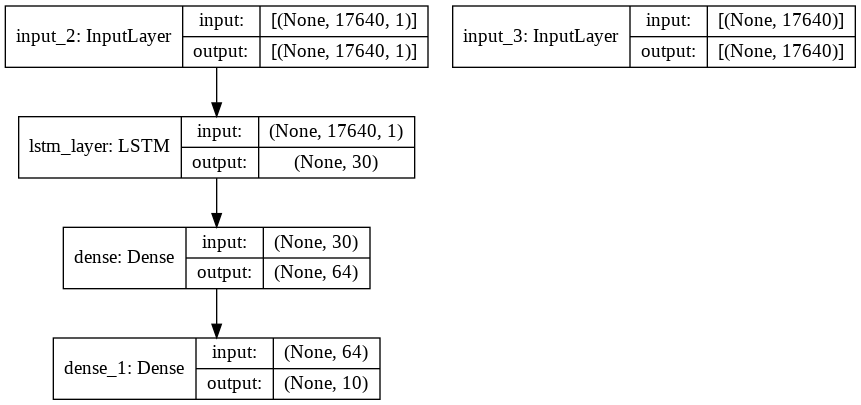

In [135]:
from tensorflow.keras.utils import plot_model
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [133]:
logdir3

'logs/20210913-095116'

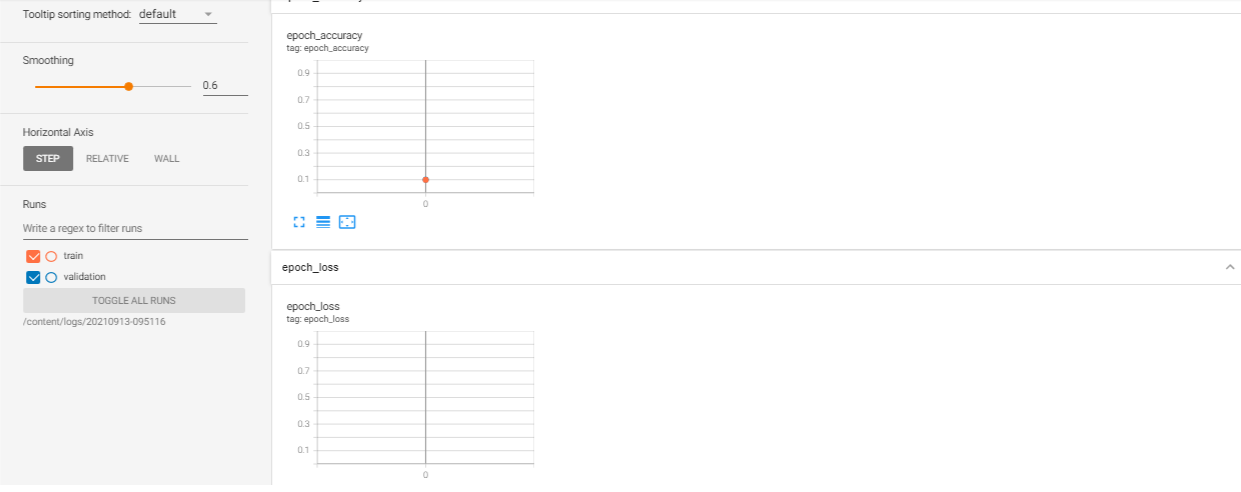

In [4]:
from IPython.display import Image
Image(filename=r'C:\Users\kingjames\Downloads\spoken digit 3 tensorboard.png')

#model 4

#converting augmented data into spectrogram  then applying model

In [136]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [137]:
X_train_spectrogram_aug=[]
X_test_spectrogram_aug=[]

In [138]:
for i in tqdm(X_train1_pad_seq_aug):
    spectogram=convert_to_spectrogram(i)
    X_train_spectrogram_aug.append(spectogram)

X_train_spectrogram_aug=np.array(X_train_spectrogram_aug)
X_train_spectrogram_aug.shape

100%|██████████| 14400/14400 [01:37<00:00, 148.22it/s]


(14400, 64, 35)

In [139]:
for i in tqdm(X_test1_pad_seq_aug):
    spectogram=convert_to_spectrogram(i)
    X_test_spectrogram_aug.append(spectogram)

X_test_spectrogram_aug=np.array(X_test_spectrogram_aug)
X_test_spectrogram_aug.shape

100%|██████████| 400/400 [00:02<00:00, 150.68it/s]


(400, 64, 35)

#micro f1 score for model 4

In [140]:
from sklearn.metrics import f1_score
class micro_f1_score4(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics11={'f1_score': []}

    def on_epoch_end(self, epoch, logs={}): 
        y_pred_final=[]
        for i in range(len(y_test_augmented)):
            b91=X_test_spectrogram_aug[i]
            b92=np.reshape(b91,(1,64,35))  # here shape is differeent
            
            y_pred=np.argmax(self.model.predict((b92)))
            y_pred_final.append(y_pred)

        from sklearn.metrics import f1_score
        f11=f1_score(y_test_augmented,y_pred_final,average='micro')

        self.metrics11["f1_score"].append(f11)

        if self.metrics11["f1_score"][epoch] > 0.80:
             print("micro f1 score has reached 0.80% so training is stopping")
             self.model.stop_training = True

        

        print("f1 score is ",self.metrics11["f1_score"][epoch])
 

In [141]:
f1_score4 = micro_f1_score4()

#tensorboard callback for model 4

In [142]:
logdir4 = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback4 = tf.keras.callbacks.TensorBoard(logdir4, histogram_freq=1,write_graph=True,write_grads=True)

ERROR:tensorflow:Failed to start profiler: Another profiler is running.


In [143]:
from tensorflow.keras.layers import Input, LSTM, Dense , GlobalAveragePooling1D

In [144]:
## as discussed above, please write the LSTM
input_layer=Input(shape=(64,35),dtype="float32")
lstm_layer=LSTM(30, name="lstm_layer",return_sequences = True)(inputs = input_layer)
average_layer = GlobalAveragePooling1D(data_format='channels_last')(lstm_layer)
dense_layer=Dense(64, activation="relu")(average_layer)
output_layer=Dense(10,activation="softmax")(dense_layer)
model4=Model(inputs=input_layer, outputs=output_layer)

In [145]:
model4.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 35)]          0         
_________________________________________________________________
lstm_layer (LSTM)            (None, 64, 30)            7920      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 10,554
Trainable params: 10,554
Non-trainable params: 0
_________________________________________________________________


In [146]:
model4.compile(optimizer=tf.keras.optimizers.Adam(),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [147]:
model4.fit(X_train_spectrogram_aug,y_train_augmented,
           epochs=200,
           batch_size=32,
           validation_data=(X_test_spectrogram_aug,y_test_augmented),
           callbacks = [f1_score4,tensorboard_callback4])

Epoch 1/200
450/450 [==============================] - 9s 16ms/step - loss: 2.0025 - accuracy: 0.2858 - val_loss: 1.7273 - val_accuracy: 0.3925
f1 score is  0.3925
Epoch 2/200
450/450 [==============================] - 6s 14ms/step - loss: 1.6506 - accuracy: 0.4149 - val_loss: 1.4878 - val_accuracy: 0.4825
f1 score is  0.4825
Epoch 3/200
450/450 [==============================] - 6s 14ms/step - loss: 1.4641 - accuracy: 0.4940 - val_loss: 1.2557 - val_accuracy: 0.5625
f1 score is  0.5625
Epoch 4/200
450/450 [==============================] - 6s 14ms/step - loss: 1.3198 - accuracy: 0.5504 - val_loss: 1.1412 - val_accuracy: 0.5925
f1 score is  0.5925
Epoch 5/200
450/450 [==============================] - 6s 14ms/step - loss: 1.2090 - accuracy: 0.5815 - val_loss: 1.0452 - val_accuracy: 0.6475
f1 score is  0.6475
Epoch 6/200
450/450 [==============================] - 6s 14ms/step - loss: 1.1217 - accuracy: 0.6153 - val_loss: 1.0220 - val_accuracy: 0.6700
f1 score is  0.67
Epoch 7/200
450/45

In [148]:
logdir4

'logs/20210913-101710'

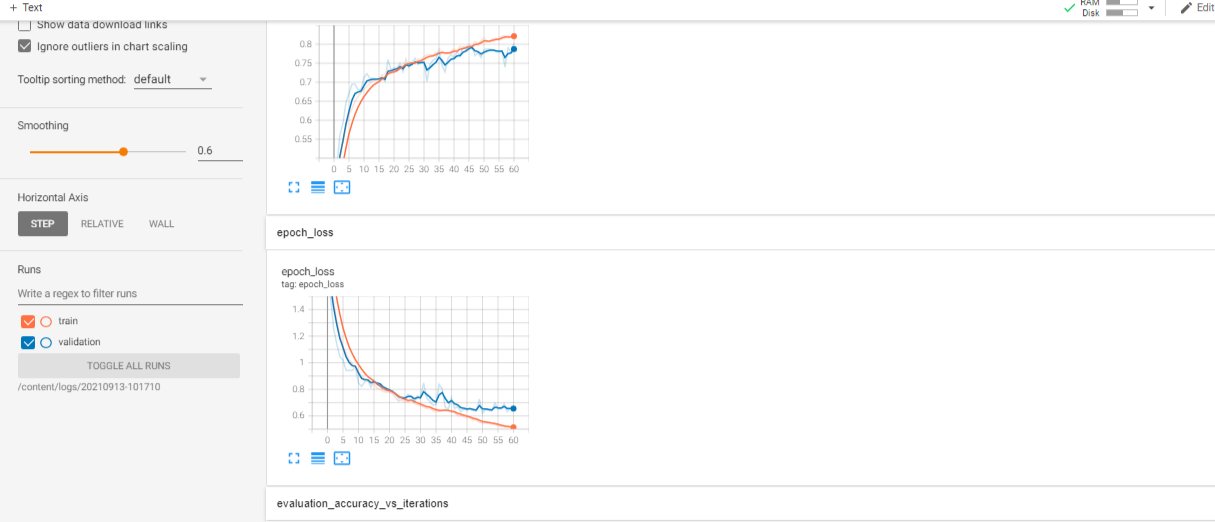

In [5]:
from IPython.display import Image
Image(filename=r'C:\Users\kingjames\Downloads\spoken model 4 tensorboard.png')

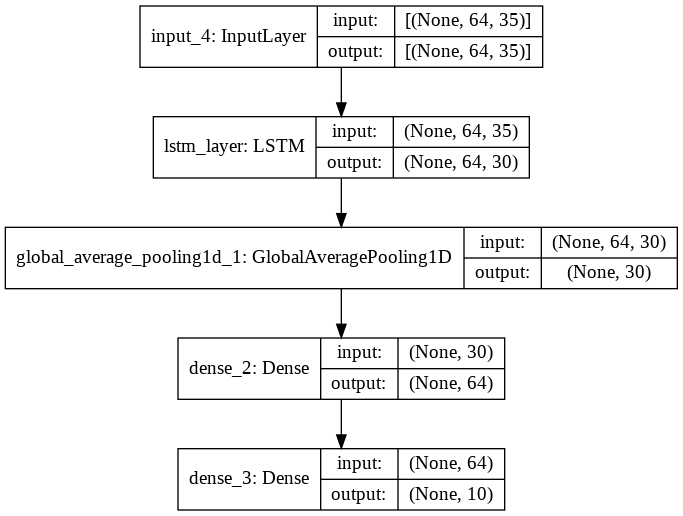

In [151]:
from tensorflow.keras.utils import plot_model
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# observations

1] Here the data is audio which has wav format. so we use librosa libarary to get vector for every audio file ,with sampling 
   rate 22050. sampling rate is basically number of observation taken per second here we took 22050.
   
2] then we each audio file must be same length so he we observaed that 99.99% of the audo file have 0.8 sec of duaration . 
    for 1 sec we have 22050 sampling rate for 0.8 sec we have 17640sampling rate
    
3] So each audio file is of length 17640.if it is less than 17640 we pad with 0 . If it is more than 17640 we truncate it .

4] then we feed it to lstm model. here we ahve 4 model. first model we directly feed it to the lstm and got desired accuracy.

5] second model we convert audio file to spectogram and then feed it to the lstm model. third model we did data augmentation 
   for each file we have created 9 files and then feed it to the lstm model. and in fourth model we convert augemnted data      to spectogram and then feed it to the model and got desired f1 score.